## EN3150 Assignment 01
#### Learning from data and related challenges and linear models for regression
T.P.I.M. Priyanjana 220495P

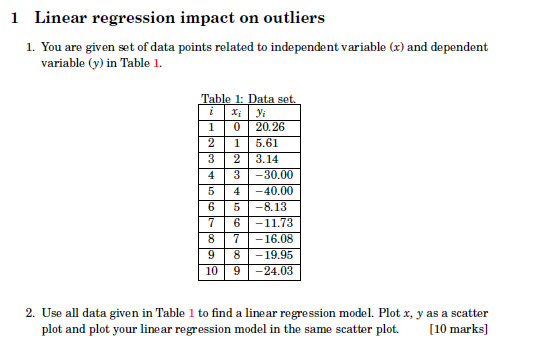


w: [-3.55727273]
b: 3.9167272727249784


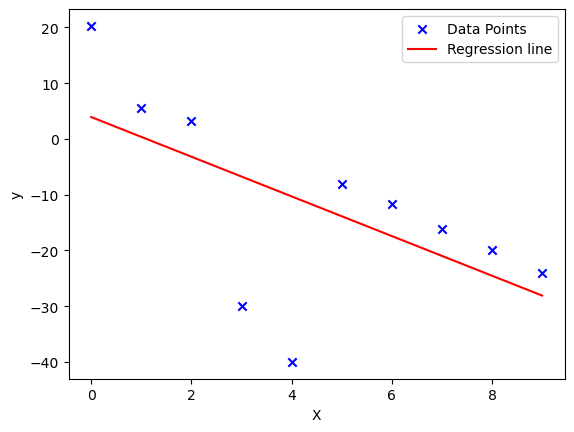

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
y = np.array([20.26,5.61,3.14,-30,-40,-8.13,-11.73,-16.08,-19.95,-24.03])

def gradient_descent(x , y , iterations ,alpha):
    m = x.shape[0]
    w = np.zeros(x.shape[1])
    b = 0
    for i in range(iterations):
        dw = (1/m) * np.dot(x.T,(np.dot(x,w) + b - y))
        db = (1/m) * np.sum(np.dot(x,w) + b - y)
        w = w - alpha * dw
        b = b - alpha * db
    return w,b

w , b = gradient_descent(x,y,10000,0.01)

y_hat = np.dot(x,w) + b

print("w:", w)
print("b:", b)

plt.scatter(x, y, color="blue", label="Data Points" , marker="x")
plt.plot(x, y_hat, color="red", label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


### Using scikit-learn library

w: -3.5572727272727267
b: 3.91672727272727


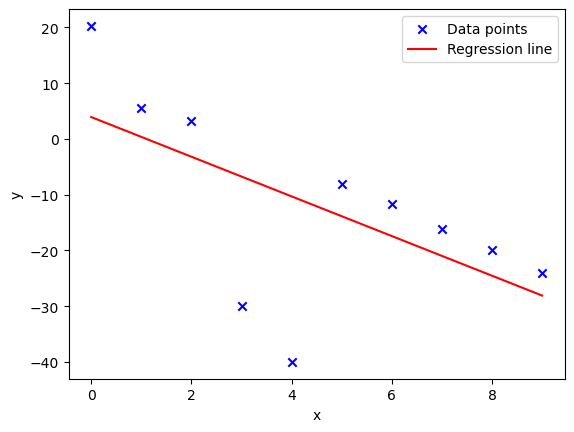

In [3]:
from sklearn.linear_model import LinearRegression

x = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
y = np.array([20.26,5.61,3.14,-30,-40,-8.13,-11.73,-16.08,-19.95,-24.03])

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

print("w:", model.coef_[0])
print("b:", model.intercept_)

plt.scatter(x, y, color="blue", label="Data points" , marker="x")
plt.plot(x, y_pred, color="red", label="Regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

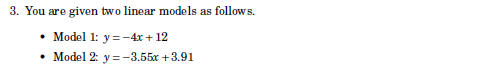
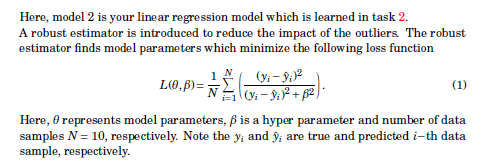
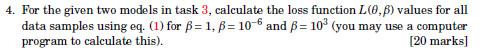

In [4]:
def lossFunction(y,y_hat,beta,N):
    return (1/N) * np.sum((y - y_hat)**2 / ((y - y_hat)**2 + beta**2)) 


# For Model 1 , y = -4x +12

# For beta = 1
y1 = -4 * x + 12
y1 = y1.flatten() 
loss1_beta1 = lossFunction(y, y1, 1, x.shape[0])
print("Loss for Model 1 , beta=1:", loss1_beta1)
# For beta = 10e-6
loss1_beta2 = lossFunction(y, y1, 1e-6, x.shape[0])
print("Loss for Model 1 , beta=1e-6:", loss1_beta2)
# For beta = 10e3
loss1_beta3 = lossFunction(y, y1, 1e3, x.shape[0])
print("Loss for Model 1 , beta=1000:", loss1_beta3)

print("\n")


# For Model 2 , y = -3.55x + 3.91

# For beta = 1
y2 = -3.55 * x + 3.91
y2 = y2.flatten()
loss2_beta1 = lossFunction(y, y2, 1, x.shape[0])
print("Loss for Model 2 , beta=1:", loss2_beta1)
# For beta = 10e-6
loss2_beta2 = lossFunction(y, y2, 1e-6, x.shape[0])
print("Loss for Model 2 , beta=1e-6:", loss2_beta2)
# For beta = 10e3
loss2_beta3 = lossFunction(y, y2, 1e3, x.shape[0])
print("Loss for Model 2 , beta=1000:", loss2_beta3)


Loss for Model 1 , beta=1: 0.435416262490386
Loss for Model 1 , beta=1e-6: 0.9999999998258207
Loss for Model 1 , beta=1000: 0.0002268287498440988


Loss for Model 2 , beta=1: 0.9728470518681676
Loss for Model 2 , beta=1e-6: 0.9999999999999718
Loss for Model 2 , beta=1000: 0.00018824684654645654


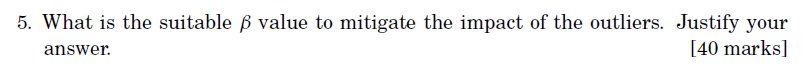

small β - loss ~1 for any model - useless for model comparison. 

very large β  -  e²/(e² + β²) ≈ r²/β² - proportional to MSE, so outliers dominate.

Moderate β : big residuals are down-weighted; inliers drive the fit (robust).



Model 1 (y = −4x + 12):
L(β=1) = 0.4354, L(10⁻⁶) ≈ 1, L(10³) = 0.0002268

Model 2 (y = −3.55x + 3.91):
L(β=1) = 0.9728, L(10⁻⁶) ≈ 1, L(10³) = 0.0001882


With β = 10⁻⁶, both losses ≈ 1 ⇒ cannot distinguish models.

With β = 10³, it reduces to (scaled) MSE and favors Model 2 (which also has lower raw MSE) ⇒ not robust to your clear outliers.

With β = 1, the robust loss prefers Model 1, aligning with robust metrics (Model 1 also has lower MAE), meaning outliers are sensibly down-weighted.

Therefore, among the given choices, β = 1 is suitable.

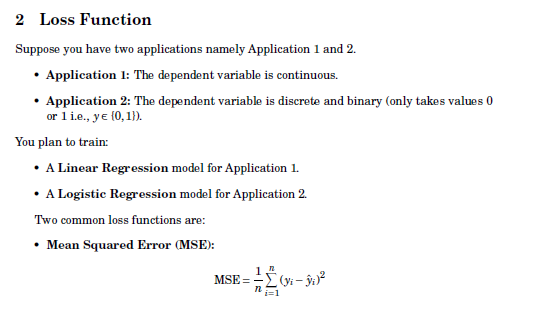
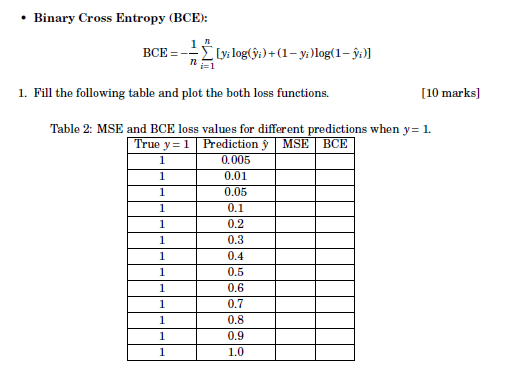

,True y,Prediction y_hat,MSE,BCE
0,1,0.005,0.990025,5.298317
1,1,0.010,0.980100,4.605170
2,1,0.050,0.902500,2.995732
3,1,0.100,0.810000,2.302585
4,1,0.200,0.640000,1.609438
5,1,0.300,0.490000,1.203973
6,1,0.400,0.360000,0.916291
7,1,0.500,0.250000,0.693147
8,1,0.600,0.160000,0.510826
9,1,0.700,0.090000,0.356675


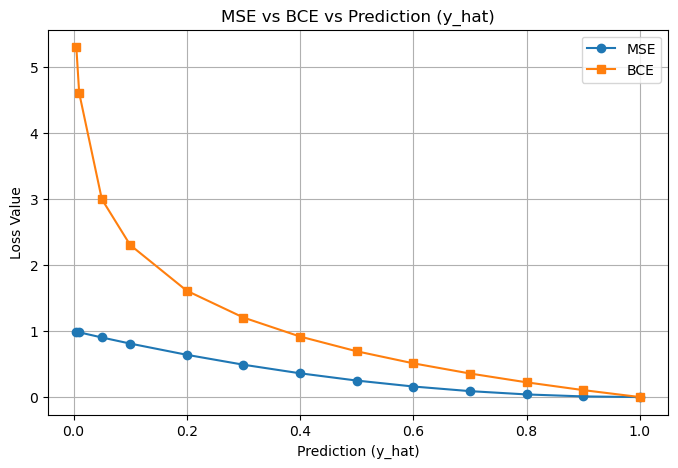

In [5]:
import pandas as pd

def MSE(y, y_hat , n):
    return np.sum((y - y_hat) ** 2) / n

def BCE(y, y_hat , n):
    if y -  y_hat == 0:
        return 0
    return -np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat )) / n

y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_hat = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

MSE_values = []
BCE_values = []

for i in range(len(y_hat)):
    MSE_values.append(MSE(y[i], y_hat[i], 1))
    BCE_values.append(BCE(y[i], y_hat[i], 1))

data = {
    'True y': y,
    'Prediction y_hat': y_hat,
    'MSE': MSE_values,
    'BCE': BCE_values
}

df = pd.DataFrame(data)

from IPython.display import display
display(df)

plt.figure(figsize=(8, 5))

plt.plot(y_hat, MSE_values, marker='o', label="MSE")
plt.plot(y_hat, BCE_values, marker='s', label="BCE")

plt.title('MSE vs BCE vs Prediction (y_hat)')
plt.xlabel('Prediction (y_hat)')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(True)

plt.show()


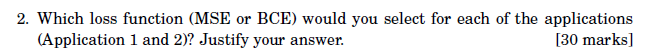



For Application 1, where the dependent variable is continuous and a Linear Regression model is applied, the most suitable loss function is the Mean Squared Error (MSE). MSE measures the average squared difference between the true values and the predictions, making it directly aligned with the objective of regression problems. It is convex and differentiable, ensuring stable gradient-based optimization, and it corresponds to the maximum likelihood estimator under the assumption of Gaussian noise in the data. Using MSE allows the model to minimize large deviations effectively and fit the continuous target variable accurately, whereas Binary Cross Entropy (BCE) is unsuitable here because it is designed for probabilities associated with discrete outcomes rather than continuous values.

For Application 2, where the dependent variable is binary and a Logistic Regression model is used, the most suitable loss function is the Binary Cross Entropy (BCE), also known as log-loss. Logistic Regression outputs probabilities for class membership, and BCE evaluates how close these predicted probabilities are to the actual binary outcomes. It penalizes confident but wrong predictions more heavily than MSE, which is critical for classification tasks. Moreover, BCE is derived from the maximum likelihood principle for Bernoulli-distributed targets, making it statistically well-justified for binary classification. In contrast, using MSE here can lead to poor probability calibration and slower convergence, so BCE is the correct choice.

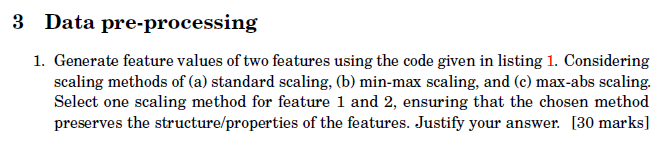


In [6]:
def generate_signal ( signal_length , num_nonzero ):
    signal = np. zeros ( signal_length )
    nonzero_indices = np. random . choice ( signal_length , num_nonzero ,
    replace = False )
    nonzero_values = 10* np. random . randn ( num_nonzero )
    signal [ nonzero_indices ] = nonzero_values
    return signal

signal_length = 100 # Total length of the signal
num_nonzero = 10 # Number of non - zero elements in the signal
your_index_no = 220495 # Enter your index no without english letters and without leading zeros
sparse_signal = generate_signal ( signal_length , num_nonzero )
sparse_signal [10] = ( your_index_no % 10) *2 + 10

if your_index_no % 10 == 0:
    sparse_signal [10] = np. random . randn (1) + 30
    sparse_signal = sparse_signal /5

epsilon = np. random . normal (0, 15, signal_length )


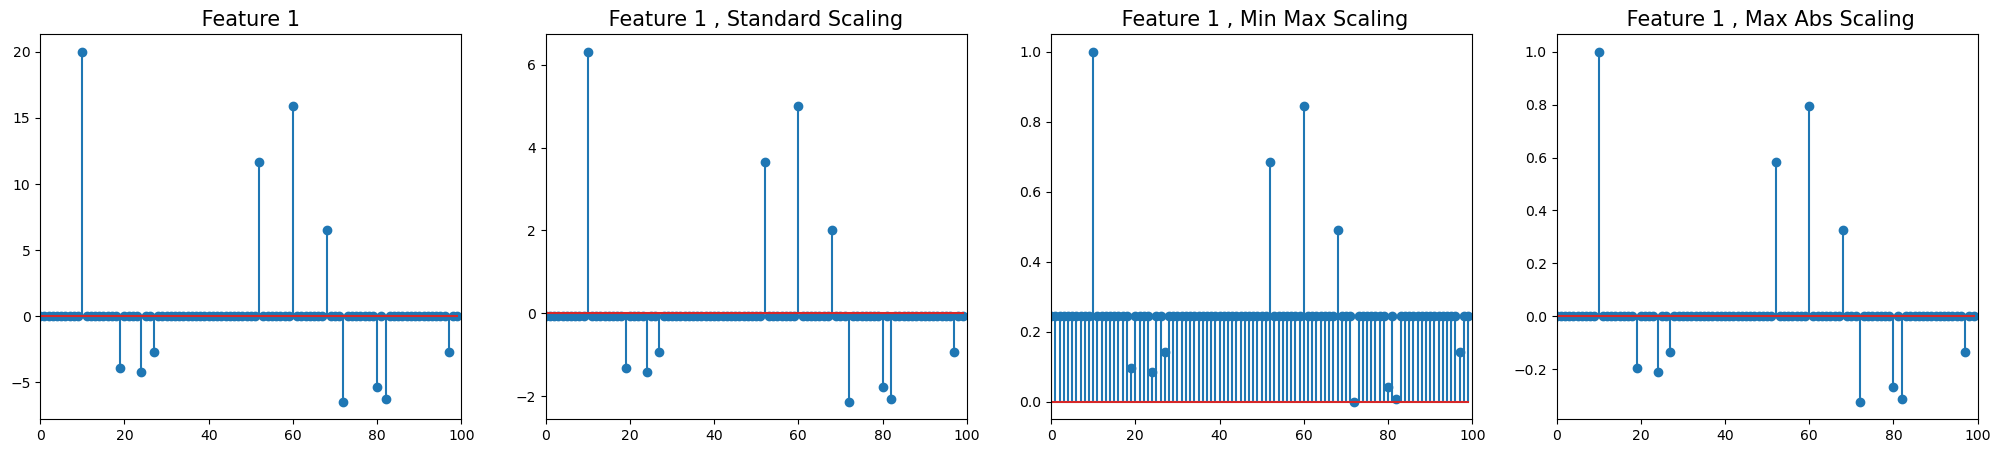

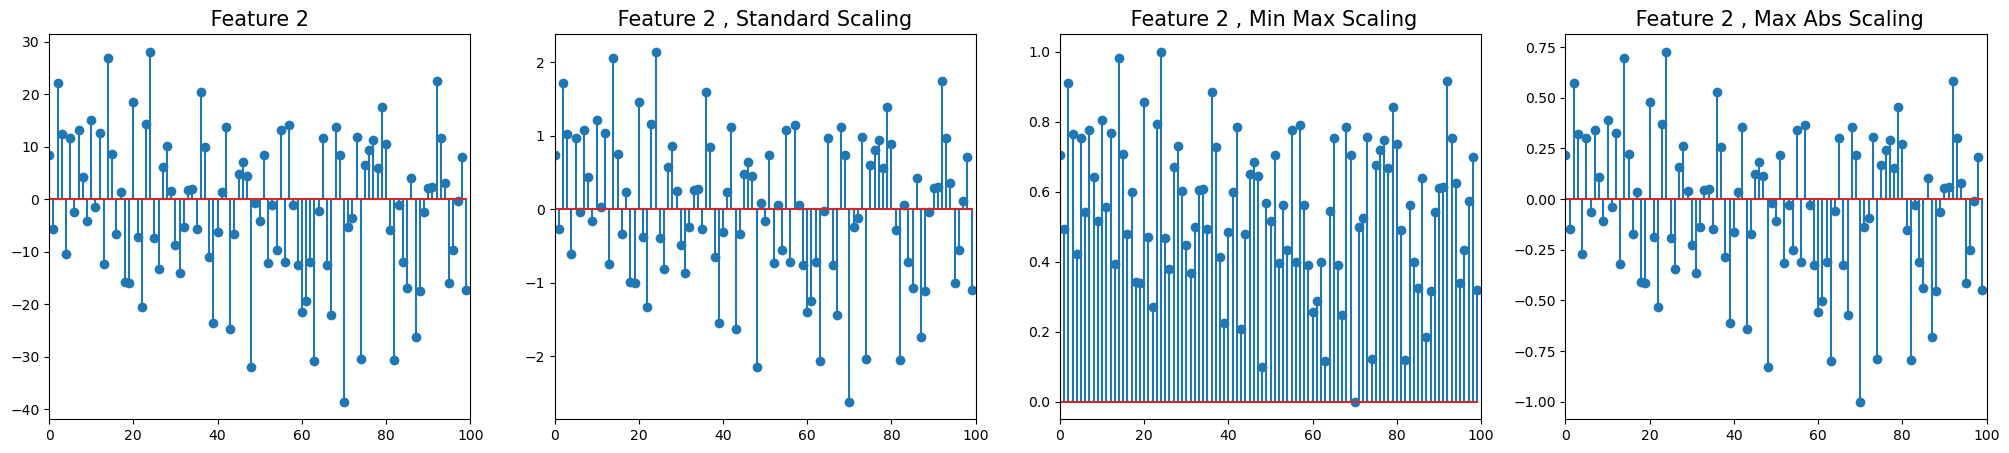

In [8]:
def standard_scaling(data):
    mean = np.mean(data)
    std = np.std(data)
    if std == 0:
        return data - mean
    return (data - mean) / std

def min_max_scaling(data):
    min_val = np.min(data)
    max_val = np.max(data)
    if max_val == min_val:
        return data - min_val
    return (data - min_val) / (max_val - min_val)

def max_abs_scaling(data):
    max_abs_val = np.max(np.abs(data))
    if max_abs_val == 0:
        return data
    return data / max_abs_val

plt . figure ( figsize =(25 ,5) )
plt . subplot (1, 4, 1)
plt . xlim (0, signal_length )
plt . title (" Feature 1 ", fontsize =15)
plt . stem (sparse_signal)

plt . subplot (1, 4, 2)
plt . xlim (0, signal_length )
plt . title (" Feature 1 , Standard Scaling ", fontsize =15)
plt . stem (standard_scaling(sparse_signal) )

plt . subplot (1, 4, 3)
plt . xlim (0, signal_length )
plt . title (" Feature 1 , Min Max Scaling", fontsize =15)
plt . stem (min_max_scaling(sparse_signal) )

plt . subplot (1, 4, 4)
plt . xlim (0, signal_length )
plt . title (" Feature 1 , Max Abs Scaling", fontsize =15)
plt . stem (max_abs_scaling(sparse_signal) )



plt . figure ( figsize =(25 ,5) )
plt . subplot (1, 4, 1)
plt . xlim (0, signal_length )
plt . title (" Feature 2 ", fontsize =15)
plt . stem (epsilon)

plt . subplot (1, 4, 2)
plt . xlim (0, signal_length )
plt . title (" Feature 2 , Standard Scaling ", fontsize =15)
plt . stem (standard_scaling(epsilon) )

plt . subplot (1, 4, 3)
plt . xlim (0, signal_length )
plt . title (" Feature 2 , Min Max Scaling", fontsize =15)
plt . stem (min_max_scaling(epsilon) )

plt . subplot (1, 4, 4)
plt . xlim (0, signal_length )
plt . title (" Feature 2 , Max Abs Scaling", fontsize =15)
plt . stem (max_abs_scaling(epsilon) )

plt . show ()


For Feature 1, which is a sparse signal with mostly zeros and a few large values, the best choice is Max-Abs Scaling. This method preserves the sparsity of the feature by keeping zeros unchanged and normalizes the nonzero values relative to the maximum absolute value, keeping them within the range [-1, 1]. Unlike Standard Scaling, which would shift zeros to negative values, or Min–Max Scaling, which could compress smaller values due to extreme outliers, Max-Abs Scaling effectively handles sparsity without distorting the signal.

For Feature 2, which is dense and approximately Gaussian, Standard Scaling is the most suitable. It centers the data to zero mean and scales it to unit variance, preserving the Gaussian-like distribution of the feature. This method ensures that the statistical properties of the noise remain intact, which is important for many machine learning algorithms that assume zero-mean, unit-variance inputs. Using Standard Scaling here maintains the natural shape of the distribution while standardizing the scale.

# PDF Export Guide

## Error Analysis
You're seeing this error because the PDF export process is failing to find the image files referenced in your notebook. The error message indicates that LaTeX cannot find `attachment:1.png` and other images.

## Solution Options

### Option 1: Fix Image References
1. Save all your attachment images (1.png, 2.png, 3.png, image.png, etc.) to the same folder as your notebook
2. Update all image references from `![image.png](attachment:image.png)` to `![image.png](image.png)`

### Option 2: Export to HTML first, then to PDF
This is often the simplest solution:
1. Use **File > Export > HTML** to create an HTML version of your notebook
2. Open the HTML file in your browser
3. Use the browser's **Print to PDF** feature (often available in the print dialog)

### Option 3: Install Full LaTeX Support
If you want to use direct PDF export with nbconvert:
1. Install a full TeX distribution:
   - Windows: [MiKTeX](https://miktex.org/download) (complete installation)
   - macOS: [MacTeX](https://www.tug.org/mactex/)
   - Linux: `sudo apt install texlive-xetex texlive-fonts-recommended texlive-plain-generic`
2. Make sure to run the MiKTeX Console and check for updates (the error mentions "you have not checked for MiKTeX updates")

## Quick Fix Command
If you're using Jupyter from the command line, try:
```
jupyter nbconvert --to webpdf "EN3150 Assignment 01 ( Learning from data and related challenges and linear models for regression ).ipynb"
```
This uses the browser-based PDF conversion and usually works better with embedded images.